In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
modi_df = pd.read_csv("../data/raw/Narendra Modi_data.csv")
rahul_df = pd.read_csv("../data/raw/Rahul Gandhi_data.csv")
kejri_df = pd.read_csv("../data/raw/Arvind Kejriwal_data.csv")

print(modi_df.head())
print(rahul_df.head())
print(kejri_df.head())

         Date             User  \
0  2022:10:19   QuestionsBotYT   
1  2022:10:19       PaperDabba   
2  2022:10:19   mnjworldcom123   
3  2022:10:19  BravePedestrian   
4  2022:10:19   NaMoPraveenKor   

                                               Tweet      Time  
0                        Is Narendra Modi a toaster?  23:57:08  
1  5G About To Bring Major Change, Will Revolutio...  23:56:38  
2  Prime Minister Shri Narendra Modi along with H...  23:51:02  
3  Bharat Mata has waited 5000 years for a true s...  23:40:58  
4  How Narendra Modi’s game-changing Gati Shakti ...  23:34:25  
         Date             User  \
0  2022:10:19          MdIjran   
1  2022:10:19  28bde43dae3c430   
2  2022:10:19         SkAnzar5   
3  2022:10:19    HariRamDamor2   
4  2022:10:19     srinivas_das   

                                               Tweet      Time  
0  @JaikyYadav16 इन विकल्पों में से और अभी के समय...  23:55:49  
1  @ndtv Rahul Gandhi left congress in the mid ro...  23:53:30  
2    

In [8]:
print("Modi:", modi_df.columns)
print("Rahul:", rahul_df.columns)
print("Kejri:", kejri_df.columns)


Modi: Index(['Date', 'User', 'Tweet', 'Time', 'candidate'], dtype='object')
Rahul: Index(['Date', 'User', 'Tweet', 'Time', 'candidate'], dtype='object')
Kejri: Index(['Date', 'User', 'Tweet', 'Time', 'candidate'], dtype='object')


In [16]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www.\S+', '', text)   # remove links
    text = re.sub(r'@\w+|#\w+', '', text)         # remove mentions/hashtags
    text = re.sub(r'[^a-z\s]', '', text)          # keep letters only
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text

# Rename 'Tweet' → 'text'
modi_df = modi_df.rename(columns={'Tweet':'text'})
rahul_df = rahul_df.rename(columns={'Tweet':'text'})
kejri_df = kejri_df.rename(columns={'Tweet':'text'})

# Keep only 'text' and 'candidate'
modi_df = modi_df[['candidate','text']]
rahul_df = rahul_df[['candidate','text']]
kejri_df = kejri_df[['candidate','text']]

# Clean tweets
modi_df['clean_text'] = modi_df['text'].apply(clean_text)
rahul_df['clean_text'] = rahul_df['text'].apply(clean_text)
kejri_df['clean_text'] = kejri_df['text'].apply(clean_text)

# Merge
combined_df = pd.concat([modi_df, rahul_df, kejri_df], ignore_index=True)

# Save processed file
combined_df.to_csv("../data/processed/combined.csv", index=False)

print("Combined dataset shape:", combined_df.shape)
print(combined_df.head())


Combined dataset shape: (210000, 3)
  candidate                                               text  \
0      Modi                        Is Narendra Modi a toaster?   
1      Modi  5G About To Bring Major Change, Will Revolutio...   
2      Modi  Prime Minister Shri Narendra Modi along with H...   
3      Modi  Bharat Mata has waited 5000 years for a true s...   
4      Modi  How Narendra Modi’s game-changing Gati Shakti ...   

                                          clean_text  
0                              narendra modi toaster  
1  g bring major change revolutionise education s...  
2  prime minister shri narendra modi along mr pra...  
3  bharat mata waited years true son like narendr...  
4  narendra modis gamechanging gati shakti master...  


In [17]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s eta 0:00:00


In [20]:
from textblob import TextBlob

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from textblob import TextBlob

def get_sentiment(text):
    if not text or text.strip() == "":
        return "neutral"
    
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

combined_df['sentiment'] = combined_df['clean_text'].apply(get_sentiment)
combined_df.to_csv("../data/processed/combined.csv", index=False)

print("Dataset with sentiment column:")
print(combined_df[['candidate','clean_text','sentiment']].head(10))

Dataset with sentiment column:
  candidate                                         clean_text sentiment
0      Modi                              narendra modi toaster   neutral
1      Modi  g bring major change revolutionise education s...  positive
2      Modi  prime minister shri narendra modi along mr pra...  positive
3      Modi  bharat mata waited years true son like narendr...  positive
4      Modi  narendra modis gamechanging gati shakti master...   neutral
5      Modi  g bring major change revolutionise education s...  positive
6      Modi  narendra modi elon musk politics entreprenuria...  positive
7      Modi  jai hind jai bhart bharat mata ki jai bande ma...  positive
8      Modi  prime minister shri narendra modi holds bilate...   neutral
9      Modi  prime minister shri narendra modi interacted i...   neutral


In [26]:
combined_df.to_csv("../data/processed/combined.csv", index=False)

sentiment
neutral     123841
positive     66097
negative     20062
Name: count, dtype: int64


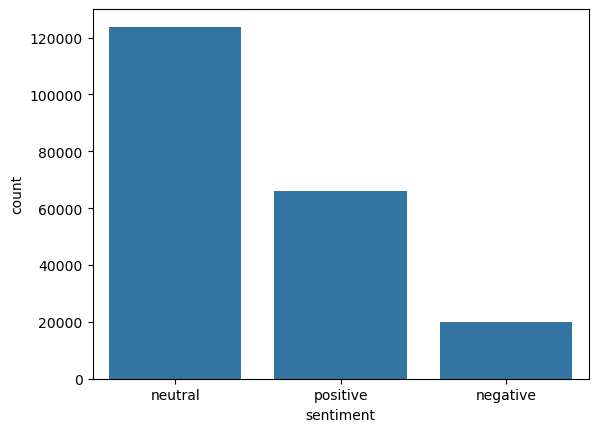

candidate  sentiment
Kejriwal   neutral      42809
           positive     18478
           negative      8713
Modi       neutral      38786
           positive     27099
           negative      4115
Rahul      neutral      42246
           positive     20520
           negative      7234
Name: count, dtype: int64


In [28]:
df = pd.read_csv("../data/processed/combined.csv")

print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.show()

print(df.groupby('candidate')['sentiment'].value_counts())